# UK GP Prescriptions- Jan 2016

* [Prescribing by GP Practice Jan 2016](https://data.gov.uk/dataset/prescribing-by-gp-practice-presentation-level/resource/6a00c0e3-8100-4165-abf0-3a5ac1dc2660)

## Motivation

The UK's collection of open Prescribing datasets provide a fascinating window on the treatment practices in the UK. 

Anna Powell-Smith and Ben Goldacre of the EBM Data Lab at the University of Oxford have created the https://openprescribing.net/, a site with dashboards and a query engine for analysis and exploration of the data.

Ben Goldacre envisages this service being used by ['patients', 'local' and 'national journalists' and others] (https://www.youtube.com/watch?v=U-hvuEfUUOM). However, OpenPrescribing.net also has a number of [cautionary notes] (https://openprescribing.net/caution/) about selecting 'prescribing measures'.

I have chosen to explore what challenges may be present in choosing appropriate 'prescibing measures' by studying the underlying prescribing data itself. This also presents an opportunity to learn Python data manipulation and analysis libraries Pandas and Numpy.

The chosen subset of the data for this project describes prescribing behaviour in the UK for January 2016. It is 1.4GB of comma separated values representating about 10 million rows.

## Core Dataset

lists all 

* medicines
* dressings 
* appliances 

prescribed and dispensed each month.

For each practice in England, the following totals are presented for each medicine, dressing and appliance, (by presentation name):

* number of items prescribed and dispensed
* net ingredient cost
* actual cost
* quantity

## Linked Datasets

* [Practice Codes and Names Jan 2016](https://data.gov.uk/dataset/prescribing-by-gp-practice-presentation-level/resource/f2800491-210c-425c-a81f-13c1feef0ac7)

* [Chemical Names for Presentations Jan 2016](https://data.gov.uk/dataset/prescribing-by-gp-practice-presentation-level/resource/50433591-a38d-4265-8307-0918119fb065)

Nb. Presentations are identified only by their BNF code in the main dataset- so use this file to recover the Chemical names

## Features

Disambiguation: [Glossary of Terms](http://digital.nhs.uk/media/10686/Download-glossary-of-terms-for-GP-prescribing---presentation-level/pdf/PLP_Presentation_Level_Glossary_April_2015.pdf)

**Presentation** : prescription (clarify this)

If a prescription form includes three medicines it is counted as three prescription items (clarify this)

* **SHA** - code of the Strategic Health Authority (SHA) in which the practice resides
* **PCT** - Primary Care Trust where Practice resides
* **BNF Code** - to find drug in British National Formulary reference text
* **Items** - Number of Prescriptions written

A prescription item refers to a single supply of a medicine, dressing or appliance prescribed on a prescription form. If a prescription form includes three
medicines it is counted as three prescription items.

* **NIC** - Net Ingredient Cost
* **ACT** - Total Actual Cost
* **Period** - tbc
* **Quantity** - "Quantity" of medication specified in Prescription

The quantity of a drug dispensed is measured in units depending on the
formulation of the product, which is given in the drug name. Quantities should not be
added together across preparations because of different strengths and formulations.

Where the formulation is tablet, capsule, ampoule, vial etc the quantity will be
the number of tablets, capsules, ampoules, vials etc

Where the formulation is a liquid the quantity will be the number of MLS

Where the formulation is a solid form (eg. Cream, gel, ointment) the quantity
will be the number of grammes

---
* **CCG** - Clinical Commissioning Group (see https://openprescribing.net/)

---

## References

* https://openprescribing.net/
* March 2009 BNF http://www.esoph.org/af/books/BNF%2057.pdf
* http://bmjopen.bmj.com/content/3/1/e001363.full Cf. accessing demographic data of clinics
* https://github.com/tmylk/geo-prescriptions
* EBM Data Lab Github https://github.com/ebmdatalab/openprescribing/issues/4


#### Extract, Transform, Load

* Load and Format Core Dataset
* Disambiguate identifiers (e.g. the column BNF CODE)
* Investigate linked datasets for relevance
* Perform any necessary joins
* Reduce the scale of the dataset using either sampling techniques or by choosing an interesting subset based on discovered criteria

#### Supplementary Datasets

* Source dataset that indicates population density throughout the UK
* Source dataset that indicates age distribution throughout the UK
* Expand time-frame of core dataset by including data that covers a full 12 month cycle

[Size, age, gender and geographic distribution of the UK population] (https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration)

#### Initial Questions

[Outlier and anomaly] (https://www.youtube.com/watch?v=U-hvuEfUUOM) detection are highlighted by Goldacre as fruitful areas of investigation. In this project- I aim to assess the challenge of finding criteria that allow for meaningful measurement of 'prescribing frequency' of a given pratice.

#### Further Questions

* Do particular surgeries, SHA areas, or trusts prescribe unusually high amounts of given drugs?
* Are there relationships between prescription frequency and population density?
* Does data over a full year reveal potential seasonal variation in prescribing?


### Load Core Dataset

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

gp_data = pd.read_csv("Prescribing_Figures.csv")

In [91]:
gp_data.shape
#gp_data.describe()

(10036406, 11)

#### Column headings and formatting

In [49]:
#list(gp_data.columns.values)
gp_data.columns.values

array([' SHA', 'PCT', 'PRACTICE', 'BNF CODE',
       'BNF NAME                                    ', 'ITEMS  ',
       'NIC        ', 'ACT COST   ', 'QUANTITY', 'PERIOD',
       '                 '], dtype=object)

These columns need some formatting: remove white space at both ends of the string:

In [50]:
gp_data.columns = gp_data.columns.map(lambda x: x.strip())
gp_data.columns.values

array(['SHA', 'PCT', 'PRACTICE', 'BNF CODE', 'BNF NAME', 'ITEMS', 'NIC',
       'ACT COST', 'QUANTITY', 'PERIOD', ''], dtype=object)

Investigate the final column named as the empty string

In [51]:
# value_counts() returns the object containing counts of unique values

print("Series datatype is "+str(gp_data[''].dtype))
print("Number of unique entries is "+str(gp_data[''].value_counts().size))

Series datatype is object
Number of unique entries is 1


This means a single value is repeated across all of its rows. Show this repeated value:

In [52]:
gp_data.loc[0:3,['']]

,
0,
1,
2,
3,


This value is not informative so drop the series.

In [53]:
# Seems to be necessary to rename series so drop can be invoked. 
# There is probably a better way- for subsequent research.

gp_data.rename(columns={'':'removeMe'}, inplace=True)

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,removeMe
10,Q44,RTV,Y04937,0402010D0AAAKAK,Chlorpromazine HCl_Tab 100mg,1,2.16,2.01,28,201601,
11,Q44,RTV,Y04937,040201060AAAAAA,Olanzapine_Tab 5mg,2,1.96,1.94,63,201601,
12,Q44,RTV,Y04937,040201060AAACAC,Olanzapine_Tab 10mg,2,1.50,1.51,35,201601,
13,Q44,RTV,Y04937,040201060AAADAD,Olanzapine_Tab 2.5mg,1,0.88,0.83,28,201601,
14,Q44,RTV,Y04937,0403010B0AAAIAI,Amitriptyline HCl_Tab 50mg,1,1.04,0.97,28,201601,
15,Q44,RTV,Y04937,0403030E0AAAAAA,Fluoxetine HCl_Cap 20mg,2,1.07,1.21,33,201601,
16,Q44,RTV,Y04937,0403030Q0AAAAAA,Sertraline HCl_Tab 50mg,3,2.35,2.41,42,201601,
17,Q44,RTV,Y04937,0403030Q0AAABAB,Sertraline HCl_Tab 100mg,4,7.74,7.30,133,201601,
18,Q44,RTV,Y04937,0403040X0AAAAAA,Mirtazapine_Tab 30mg,1,1.36,1.27,28,201601,
19,Q44,RTV,Y04937,0403040X0AAANAN,Mirtazapine_Tab 15mg,1,0.35,0.44,7,201601,


In [54]:
gp_data.drop('removeMe', axis=1, inplace=True)
gp_data.columns

Index(['SHA', 'PCT', 'PRACTICE', 'BNF CODE', 'BNF NAME', 'ITEMS', 'NIC',
       'ACT COST', 'QUANTITY', 'PERIOD'],
      dtype='object')

#### Missing Values

In [55]:
gp_data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10036406 entries, 0 to 10036405
Data columns (total 10 columns):
SHA         10036406 non-null object
PCT         10036406 non-null object
PRACTICE    10036406 non-null object
BNF CODE    10036406 non-null object
BNF NAME    10036406 non-null object
ITEMS       10036406 non-null int64
NIC         10036406 non-null float64
ACT COST    10036406 non-null float64
QUANTITY    10036406 non-null int64
PERIOD      10036406 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 765.7+ MB


No missing values.

In [57]:
gp_data.loc[:,'PERIOD'].value_counts().size

1

PERIOD indicates the year/month of the data. It's possible that separate periods may be compared in future analyses. But for now the column will be dropped as this analysis concentrates just on the January data.

In [58]:
gp_data.drop('PERIOD', axis=1, inplace=True)
gp_data[0:11]

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY
0,Q44,RTV,Y04937,0401010Y0AAABAB,Zolpidem Tart_Tab 10mg,1,2.56,2.38,56
1,Q44,RTV,Y04937,0401010Z0AAAAAA,Zopiclone_Tab 7.5mg,1,0.67,0.73,14
2,Q44,RTV,Y04937,0401010Z0AAACAC,Zopiclone_Tab 3.75mg,1,1.41,1.31,28
3,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,2,1.72,1.61,56
4,Q44,RTV,Y04937,0401020K0AAAIAI,Diazepam_Tab 5mg,1,0.68,0.74,21
5,Q44,RTV,Y04937,0401020K0AAAJAJ,Diazepam_Tab 10mg,1,1.52,1.52,42
6,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,1,1.74,1.72,84
7,Q44,RTV,Y04937,0402010ABAABABA,Quetiapine_Tab 150mg M/R,1,39.59,36.68,21
8,Q44,RTV,Y04937,0402010ADAAABAB,Aripiprazole_Tab 15mg,1,20.24,18.71,28
9,Q44,RTV,Y04937,0402010D0AAAIAI,Chlorpromazine HCl_Tab 25mg,1,1.08,1.11,14


#### Scope and Summary of Data

This investigation aims to reveal what challenges are present in choosing a suitable metric for 'prescribing frequency' in the dataset- a metric that could for instance be used to investigate interesting anomales in prescribing habits of different UK surgeries or SHA regions. 

It will help to understand how many unique drugs, surgeries, trusts and SHA regions are under investigation.

In [59]:
# Find a better way of doing this

print("SHA: %d" % gp_data.loc[:,'SHA'].value_counts().size)
print("PCT: %d" % gp_data.loc[:,'PCT'].value_counts().size)
print("PRACTICE: %d" % gp_data.loc[:,'PRACTICE'].value_counts().size)
print("BNF CODE: %d" % gp_data.loc[:,'BNF CODE'].value_counts().size)
print("BNF NAME: %d" % gp_data.loc[:,'BNF NAME'].value_counts().size)

SHA: 27
PCT: 372
PRACTICE: 9905
BNF CODE: 21773
BNF NAME: 19008


### Features

* Drawing feature(s) from the BNF Code

The BNF Code is a 15 digit code in which the first seven digits are allocated according to the categories in the BNF and the last 8 digits represent the medicinal product, form, strength and the link to the generic equivalent product. The digits in the code represent the following information:

- 1 & 2		BNF Chapter
- 3 & 4 		BNF Section
- 5 & 6		BNF Paragraph
- 7		BNF Sub-Paragraph
- 8 & 9		Chemical substance
- 10 & 11		Product
- 12 & 13		Strength / Formulation
- 14 & 15		Link to the generic equivalent product.  A is used when there is no linking record.

(http://www.nhsbsa.nhs.uk/PrescriptionServices/Documents/PCA_Glossary_V2_-_04-06-13.doc)

**Using Chapter and section as a feature**

From the BNF code breakdown above- it is possible to see that the first 9 characters of the code effectively 'identify' a drug. This also seems to be the model that  https://openprescribing.net/chemical/ follows.

**Focusing on antidepressants**

Chapter 4 Section 3 (BNF Code starting 0403) in the BNF lists antidepressant drugs. The paragraph / subsection breakdown based on the March 2009 BNF is as follows (check current!):

- 040301: Tricyclic and related antidepressant drugs
- 040302: MAOIs
- 040303: SSRIs
- 040304: Others

Creating a feature out of this Chapter and Section may lead to some interesting discoveries about relative prescribing frequency of these kinds of drugs.

**Uniquely identifying a drug**

For this it seems the first 9 characters are sufficient. This is the convention used on openprescribing.net

In [60]:
# Antidepressant BNF codes match 0403 on the left
gp_data['ANTIDEPRESSANT'] = gp_data['BNF CODE'].map(lambda x: int(x[:4] == "0403"))
gp_data.loc[ (gp_data['ANTIDEPRESSANT'] == 1),][0:5]

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,ANTIDEPRESSANT
14,Q44,RTV,Y04937,0403010B0AAAIAI,Amitriptyline HCl_Tab 50mg,1,1.04,0.97,28,1
15,Q44,RTV,Y04937,0403030E0AAAAAA,Fluoxetine HCl_Cap 20mg,2,1.07,1.21,33,1
16,Q44,RTV,Y04937,0403030Q0AAAAAA,Sertraline HCl_Tab 50mg,3,2.35,2.41,42,1
17,Q44,RTV,Y04937,0403030Q0AAABAB,Sertraline HCl_Tab 100mg,4,7.74,7.30,133,1
18,Q44,RTV,Y04937,0403040X0AAAAAA,Mirtazapine_Tab 30mg,1,1.36,1.27,28,1


In [61]:
# Column for unique drug identification
gp_data['DRUG_ID'] = gp_data['BNF CODE'].map(lambda x: x[:9])
gp_data.loc[:5]

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,ANTIDEPRESSANT,DRUG_ID
0,Q44,RTV,Y04937,0401010Y0AAABAB,Zolpidem Tart_Tab 10mg,1,2.56,2.38,56,0,0401010Y0
1,Q44,RTV,Y04937,0401010Z0AAAAAA,Zopiclone_Tab 7.5mg,1,0.67,0.73,14,0,0401010Z0
2,Q44,RTV,Y04937,0401010Z0AAACAC,Zopiclone_Tab 3.75mg,1,1.41,1.31,28,0,0401010Z0
3,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,2,1.72,1.61,56,0,0401020K0
4,Q44,RTV,Y04937,0401020K0AAAIAI,Diazepam_Tab 5mg,1,0.68,0.74,21,0,0401020K0
5,Q44,RTV,Y04937,0401020K0AAAJAJ,Diazepam_Tab 10mg,1,1.52,1.52,42,0,0401020K0


In [62]:
# Number of unique antidepressants
# The number of groups is the number of drugs in the Antidepressant section (0403)
len(gp_data.loc[ (gp_data['ANTIDEPRESSANT'] == 1) , [ 'DRUG_ID'] ].groupby('DRUG_ID'))

30

In [63]:
# Select the antidepressants

unique_depressants = gp_data.loc[ (gp_data['ANTIDEPRESSANT'] == 1) ,].loc[:,'DRUG_ID'].value_counts()
print(str(unique_depressants.shape) + " rows")

(30,) rows


### Checking drugs against BNF

In [64]:
uni_dep = unique_depressants.to_frame(name=None)
uni_dep.columns = ['COUNT']

# the drug id is currently the index
# create a DRUG_ID column and assign the index to it
uni_dep.insert(0, 'DRUG_ID', uni_dep.index, allow_duplicates=False)

# set a numeric index
uni_dep.index = range(uni_dep.shape[0])
uni_dep

,DRUG_ID,COUNT
0,0403040W0,54262
1,0403040X0,36355
2,0403010B0,25704
3,0403030D0,23924
4,0403030P0,20117
5,0403030Q0,17349
6,0403030E0,16959
7,0403030X0,16733
8,0403010X0,16216
9,0403040Y0,14694


In [65]:
# Left join on DRUG_ID
merged = pd.merge(uni_dep, gp_data, how='left', on='DRUG_ID')

In [66]:
# Print out some results
merged.loc[60:70,['DRUG_ID','BNF NAME']]

,DRUG_ID,BNF NAME
60,0403040W0,Efexor XL_Cap 150mg
61,0403040W0,Vensir XL_Cap 75mg
62,0403040W0,Vensir XL_Cap 150mg
63,0403040W0,Venaxx XL_Cap 75mg
64,0403040W0,Venaxx XL_Cap 150mg
65,0403040W0,Venlalic XL_Tab 37.5mg
66,0403040W0,Venlafaxine_Tab 37.5mg
67,0403040W0,Venlafaxine_Tab 75mg
68,0403040W0,Venlafaxine_Cap 75mg M/R
69,0403040W0,Venlafaxine_Cap 150mg M/R


In [67]:
filtered = merged.drop_duplicates(['DRUG_ID'],keep='first')
print(filtered.shape)
filtered.sort('BNF NAME')

(30, 12)


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,DRUG_ID,COUNT,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,ANTIDEPRESSANT
304666,0403040Z0,867,Q44,01C,N81026,0403040Z0AAAAAA,Agomelatine_Tab 25mg,1,60.00,55.43,56,1
90617,0403010B0,25704,Q44,RTV,Y04937,0403010B0AAAIAI,Amitriptyline HCl_Tab 50mg,1,1.04,0.97,28,1
306391,0403040AB,32,Q44,12F,N85002,0403040ABBBACAC,Brintellix_Tab 20mg,2,55.44,51.22,56,1
295229,0403030Z0,3010,Q44,01C,N81013,0403030Z0AAAAAA,Citalopram HCl_Oral Dps 40mg/ml S/F,1,6.07,5.62,15,1
116321,0403030D0,23924,Q44,RXA,Y00327,0403030D0AAAAAA,Citalopram Hydrob_Tab 20mg,7,5.93,5.86,182,1
255564,0403010F0,10855,Q44,01C,N81002,0403010F0AAABAB,Clomipramine HCl_Cap 25mg,1,6.48,6.00,112,1
242313,0403010J0,13251,Q44,01C,N81002,0403010J0AAAAAA,Dosulepin HCl_Cap 25mg,3,14.90,13.79,280,1
298239,0403010L0,1792,Q44,01C,N81022,0403010L0AAABAB,Doxepin_Cap 25mg,1,97.00,89.60,28,1
227619,0403040Y0,14694,Q44,RTV,Y04937,0403040Y0AAABAB,Duloxetine HCl_Cap G/R 60mg,3,52.38,48.42,84,1
194670,0403030X0,16733,Q44,01C,N81002,0403030X0AAAAAA,Escitalopram_Tab 10mg,13,25.20,23.44,588,1


** Observation 1 **

This list of the 30 antidepressants prescribed in January 2016 helps to focus the question of what a comprehensive measure of prescribing frequency could include.

The OpenPrescribing project seems to focus on the Quantity of Items featuring a given drug that are prescribed. However, to what extent does this account for:

* amount (mg) of drug prescribed
* potential similarities between uniquely identified drugs

### A Basic Items-based measure of Antidepressant prescribing

In [68]:
practice_groupings = gp_data.groupby('PRACTICE')

practices = practice_groupings['ITEMS'].sum().to_frame(name=None)
practices.columns = ['ALL ITEMS']

# the practice is currently the index
# create a practice column and assign the index to it

practices.insert(0, 'PRACTICE', practices.index, allow_duplicates=False)

# set a numeric index
practices.index = range(practices.shape[0])
practices[0:5]

,PRACTICE,ALL ITEMS
0,A81001,7212
1,A81002,37353
2,A81003,7521
3,A81004,14729
4,A81005,15367


In [69]:
# Group by Practice

# For each group, the subset of indexes corresponding to the rows
# where antidepressant == 1

antidep_items = practice_groupings.apply(lambda x: x[x['ANTIDEPRESSANT'] == 1]['ITEMS'].sum())
#antidep_items.shape
#antidep_items[0:5]
#practices.insert(2, 'ANTIDEPRESSANT ITEMS', antidep_items, allow_duplicates=False)
#practices[0:5]

antidep = antidep_items.to_frame(name=None)
antidep.columns = ['ANTIDEPRESSANT ITEMS']

antidep.insert(0, 'PRACTICE', antidep.index, allow_duplicates=False)
antidep.index = range(antidep.shape[0])
antidep[0:5]

,PRACTICE,ANTIDEPRESSANT ITEMS
0,A81001,426
1,A81002,2498
2,A81003,450
3,A81004,887
4,A81005,846


In [70]:
antidep.shape

(9905, 2)

In [71]:
# Attempt a merge

items_by_practice = pd.merge(practices, antidep, how='left', on='PRACTICE')
items_by_practice[0:5]

,PRACTICE,ALL ITEMS,ANTIDEPRESSANT ITEMS
0,A81001,7212,426
1,A81002,37353,2498
2,A81003,7521,450
3,A81004,14729,887
4,A81005,15367,846


In [72]:
items_by_practice['PRESCRIPTION RATIO'] = items_by_practice['ANTIDEPRESSANT ITEMS'] / items_by_practice['ALL ITEMS']
items_by_practice.head()

,PRACTICE,ALL ITEMS,ANTIDEPRESSANT ITEMS,PRESCRIPTION RATIO
0,A81001,7212,426,0.059068
1,A81002,37353,2498,0.066875
2,A81003,7521,450,0.059832
3,A81004,14729,887,0.060221
4,A81005,15367,846,0.055053


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1841d6898>]], dtype=object)

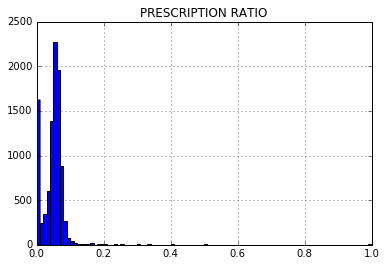

In [73]:
items_by_practice.hist(column='PRESCRIPTION RATIO',bins=100)
#items_by_practice.shape

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117b8fd30>]], dtype=object)

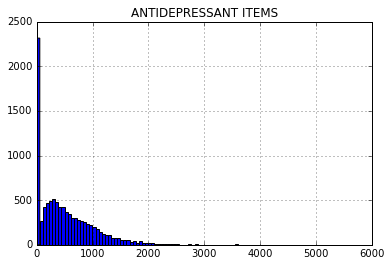

In [74]:
items_by_practice.hist(column='ANTIDEPRESSANT ITEMS',bins=100)

Clinics prescribing 0 are most likely qualitatively different from the others

#### Confidence Intervals

We take the stanard error of the mean as a confidence interval where the 'mean' for each row is the PRESCRIPTION RATIO, the sample size ALL ITEMS. This is the formula used for the binomial confidence interval:

\begin{equation*}
p\pm z\sqrt{\frac{p(1-p)}{n}}
\end{equation*}

z is chosen as 1.96

In [75]:
def fx(p, n):
     return p-1.96*np.sqrt(p*(1-p)/n)

items_by_practice['LOWER'] = np.vectorize(lambda p,n: p-1.96*np.sqrt(p*(1-p)/n))(items_by_practice['PRESCRIPTION RATIO'],
                                              items_by_practice['ALL ITEMS'])

items_by_practice['UPPER'] = np.vectorize(lambda p,n: p+1.96*np.sqrt(p*(1-p)/n))(items_by_practice['PRESCRIPTION RATIO'],
                                              items_by_practice['ALL ITEMS'])

items_by_practice['ERROR'] = np.vectorize(lambda p,n: 1.96*np.sqrt(p*(1-p)/n))(items_by_practice['PRESCRIPTION RATIO'],
                                              items_by_practice['ALL ITEMS'])

items_by_practice.head()

,PRACTICE,ALL ITEMS,ANTIDEPRESSANT ITEMS,PRESCRIPTION RATIO,LOWER,UPPER,ERROR
0,A81001,7212,426,0.059068,0.053627,0.064509,0.005441
1,A81002,37353,2498,0.066875,0.064342,0.069409,0.002533
2,A81003,7521,450,0.059832,0.054472,0.065193,0.005360
3,A81004,14729,887,0.060221,0.056379,0.064063,0.003842
4,A81005,15367,846,0.055053,0.051447,0.058659,0.003606


The normal approximation used for the confience intervals won't be reliable for rows where ALL ITEMS is small. However, the error bars will nevertheless point to potentially interesting anomales or outliers.

Plotting all of 9905 practices shows some potential problems with this error model.

Nb. this computation takes some time, so uncomment it to run it:

In [1]:
#a = items_by_practice.sort('PRESCRIPTION RATIO')
#a['PRESCRIPTION RATIO'].plot.bar(yerr=a['ERROR'])
#items_by_practice['PRESCRIPTION RATIO'][0:50].plot.scatter(yerr=items_by_practice['ERROR'])

Exploring one example where the error is greater than the value itself:

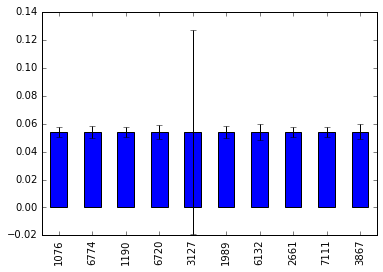

In [86]:
a['PRESCRIPTION RATIO'][5030:5040].plot.bar(yerr=a['ERROR'][5030:5040])

We can see that the sample size (ALL ITEMS = 37) is small

In [88]:
items_by_practice[3127:3128]

,PRACTICE,ALL ITEMS,ANTIDEPRESSANT ITEMS,PRESCRIPTION RATIO,LOWER,UPPER,ERROR
3127,F84727,37,2,0.054054,-0.018808,0.126916,0.072862


And looking at all examples where the error is greater than the probability of prescribing an antidepressant:

In [93]:
items_by_practice.loc[ (items_by_practice['ERROR'] > items_by_practice['PRESCRIPTION RATIO']), ]

,PRACTICE,ALL ITEMS,ANTIDEPRESSANT ITEMS,PRESCRIPTION RATIO,LOWER,UPPER,ERROR
143,A82619,7,2,0.285714,-0.048950,0.620378,0.334664
677,B82638,239,3,0.012552,-0.001563,0.026667,0.014115
764,B83699,5,1,0.200000,-0.150615,0.550615,0.350615
1613,C87612,18,2,0.111111,-0.034074,0.256296,0.145185
1899,D82643,94,3,0.031915,-0.003619,0.067449,0.035534
2230,E83645,99,3,0.030303,-0.003465,0.064071,0.033768
2335,E84707,9,1,0.111111,-0.094212,0.316434,0.205323
2476,E85724,40,1,0.025000,-0.023384,0.073384,0.048384
2585,E87691,29,2,0.068966,-0.023261,0.161192,0.092227
2617,E87774,51,1,0.019608,-0.018445,0.057661,0.038053


Try out the string matching method: 'Diazepam_Tab'